In [ ]:
import numpy as np
import pandas as pd

import torch
import torch.nn as nn

### 순전파 실습 - 가중치 부여와 가중합 계산

In [ ]:
torch.manual_seed(1017) # 랜덤한 요소들을 제어하는 장치
network = nn.Linear(in_features = 3, out_features = 7) # 입력으로 길이가 3인 tensor을 받아서, 출력으로 7인 tensor 출력하는 네트워크
network


Linear(in_features=3, out_features=7, bias=True)

In [ ]:
torch.manual_seed(1017)
inputs = torch.randn(3) # 랜덤한 숫자를 생성하는 메소드
inputs 

tensor([-0.4318,  0.0749, -0.1667])

In [ ]:
network(inputs)

tensor([ 0.0314,  0.3959, -0.4911,  0.4519,  0.2199, -0.2257,  0.4324],
       grad_fn=<AddBackward0>)


network(inputs)의 값이 어떻게 출력되었는지 확인

In [ ]:
network.weight

Parameter containing:
tensor([[ 0.3569,  0.2498,  0.1576],
        [-0.4434, -0.4714,  0.0233],
        [ 0.2524,  0.3831, -0.0351],
        [-0.2784, -0.3108, -0.5440],
        [ 0.5353,  0.4227,  0.3971],
        [-0.1924,  0.5192, -0.1625],
        [ 0.2561,  0.5234,  0.3877]], requires_grad=True)

In [ ]:
torch.sum(inputs * network.weight[0]) # 실제 값 0.0314 -> 값이 다름(bias가 더해진 것을 알 수 있다.)

tensor(-0.1617, grad_fn=<SumBackward0>)

In [ ]:
network # bias가 True인 것을 알 수 있다.

Linear(in_features=3, out_features=7, bias=True)

In [ ]:
torch.manual_seed(1017)
network_nobias = nn.Linear(in_features = 3, out_features = 7, bias=False)
network_nobias

Linear(in_features=3, out_features=7, bias=False)

In [ ]:
network_nobias(inputs) # 위의 torch.sum 값과 같은 것을 알 수 있다.

tensor([-0.1617,  0.1523, -0.0745,  0.1876, -0.2657,  0.1490, -0.1361],
       grad_fn=<SqueezeBackward3>)

In [ ]:
## 모든 노드들이 그러면 같은 bias값을 가질까?

bias_first_output = network(inputs)[0]
nobias_first_output = network_nobias(inputs)[0]
first_bias = bias_first_output - nobias_first_output

bias_second_output = network(inputs)[1]
nobias_second_output = network_nobias(inputs)[1]
second_bias = bias_second_output - nobias_second_output

print(first_bias)
print(second_bias)

## bias값이 다 다른것을 알 수 있다.

tensor(0.1931, grad_fn=<SubBackward0>)
tensor(0.2436, grad_fn=<SubBackward0>)


## 순전파 실습 : 활성화 함수 적용

In [ ]:
network

Linear(in_features=3, out_features=7, bias=True)

In [ ]:
def sigmoid(x) : 
  return 1/(1 + np.exp(-x)) 


In [ ]:
outputs = network(inputs)
sigmoid(outputs)

## 돌아가지 않음 -> output은 torch에서 들어간 값이므로 tensor이다.
## sigmoid에서 np를 사용했기 때문에 tensor과 호환이 되지 않는다.

RuntimeError: ignored

In [ ]:
## 해결 방법
def sigmoid_torch(x) : 
  return 1/(1 + torch.exp(-x)) # 수식

outputs = network(inputs)
sigmoid_torch(outputs)

# grad_fn=<MulBackward0>) -> numpy로 변환을 안되게 해줌(역전파 과정에 필요한 기울기를 torch에서는 저장하기 때문에)

tensor([0.5078, 0.5977, 0.3796, 0.6111, 0.5548, 0.4438, 0.6064],
       grad_fn=<MulBackward0>)

In [ ]:
outputs_nograd = outputs.detach() # 역전파 과정에 필요한 기울기를 제거하는 함수
sigmoid(outputs_nograd.numpy()) # torch를 numpy로 변환을 하면 기존의 만든 함수가 잘 작동하는 것을 확인 할 수 있음

array([0.50784945, 0.5976975 , 0.37962347, 0.6110856 , 0.5547533 ,
       0.44380778, 0.6064477 ], dtype=float32)

In [ ]:
np.round(sigmoid(outputs_nograd.numpy()), 4)

AttributeError: ignored

In [ ]:
torch.manual_seed(1017)

total_network = nn.Sequential(
    nn.Linear(3,7),
    nn.Sigmoid()
)

In [ ]:
total_network(inputs)

tensor([0.5078, 0.5977, 0.3796, 0.6111, 0.5548, 0.4438, 0.6064],
       grad_fn=<SigmoidBackward0>)

## 활성화 함수의 효과 확인하기 : 비선형성 증가

In [ ]:
from sklearn.datasets import load_iris

iris = load_iris()
iris_data = iris['data']
iris_label = iris['target'] # 붓꽃의 종류 label
iris_colname = iris['feature_names'] # dataframe을 만들기 위해 가져온 열 이름

print(iris_data.shape, iris_label.shape)

(150, 4) (150,)


In [ ]:
iris_labeldata = np.hstack([iris_data, iris_label.reshape(-1,1)]) #horizon stack
iris_df = pd.DataFrame(iris_labeldata, columns=iris_colname + ['label'])
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [ ]:
iris_df.iloc[:, [0,2]] #indexing/slicing이라고함
# iloc[row, column] 형태
# : 는 전체 값을 다 가져온다는 말과 같다.

,sepal length (cm),petal length (cm)
0,5.1,1.4
1,4.9,1.4
2,4.7,1.3
3,4.6,1.5
4,5.0,1.4
...,...,...
145,6.7,5.2
146,6.3,5.0
147,6.5,5.2
148,6.2,5.4


In [ ]:
iris_length = iris_df.iloc[:, [0,2, 4]] # 이해하기 쉬운 그림을 그리기 위해 변수를 2개로 설정

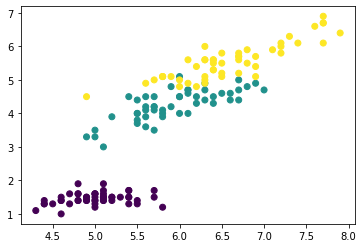

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(iris_length['sepal length (cm)'], iris_length['petal length (cm)'], c = iris_length['label'])

# 앞에 있는게 x축 뒤에있는게 y축 c는 색깔(label에 따라 색깔을 구분함)

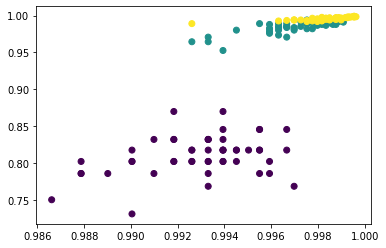

In [ ]:
sig_iris = sigmoid(iris_length.iloc[:,[0,1]])
plt.scatter(sig_iris['sepal length (cm)'],sig_iris['petal length (cm)'], c= iris_length['label'])